In [72]:
## importing libraries
import pandas as pd
import numpy as np
import os
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk

## importing dataset
df = pd.read_csv('/Users/maxsteffey/Downloads/hogwarts_legacy_reviews.csv', index_col=[0])

## read text files
tmp_pos = open('/Users/maxsteffey/Downloads/positive-words.txt', encoding='latin-1')
tmp_neg = open('/Users/maxsteffey/Downloads/negative-words.txt', encoding='latin-1')
pos = tmp_pos.read()
neg = tmp_neg.read()

## split text into a set for matching
pw = set(pos.split())
nw = set(neg.split())
tmp_pos.close()
tmp_neg.close()

print(len(pw))
print(len(nw))

2006
4783


In [35]:
def preprocessing(raw_text):
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords 
    import regex as re
    
    ## convert to lowercase
    lower_text = raw_text.lower()
    
    ## remove punctuation
    letters_only = re.sub("[^a-z]",
                          " ",     
                          lower_text)
     
    # 4. Remove stop words and return final string
    sw = stopwords.words('english')
    tmp = letters_only.split()
    tmp_ar = [w for w in tmp if w not in sw]
    tmp_o = ' '.join(tmp_ar)
    return tmp_o

In [29]:
## subsetting data to remove feedback column and trim to 1000 rows
data = df.drop(['Feedback'], axis=1)
data = df.iloc[0:1000, :]

In [31]:
## appending all review data to one huge string
text = data['Review']
string = ''
for i in text:
    string += str(i)

'Greattt Game!9/10Fantastic experience. A true Wizarding World experience. Play it and experience it, the castle alone is the worth it. And thats only a third of the game.worth itI\'ve been waiting 84 YEARSSSSSSSS.The game is everything I could have hoped for and more.very fun game (it is not transphobic at all)Better than expected! But bad optimization.GarbageFull of surprises!Fun Harry Potter Game! My sister and I Enjoyed it.One of the best games I have bought in my recent memoryDenuvo Anti-Tampering makes the game stutter, same as every other game that adopts this cancer.very funI have awaited this game for a over a decade, and I wasn\'t disappointed. Quite an achievement.The best game of the yearVery aesthetically made gameLove the game! I needed to upgrade my graphics card and more RAM, but now that I\'m all set up, it\'s great!Excellent gameGreat game. Love all the little details to make this game come aliveI no watch harry potter movies but being wizard fun. Good game. Make DLC7

In [36]:
## preprocessing data
final_df = preprocessing(string)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxsteffey/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
final_df

'greattt game fantastic experience true wizarding world experience play experience castle alone worth thats third game worth iti waiting yearssssssss game everything could hoped fun game transphobic better expected bad optimization garbagefull surprises fun harry potter game sister enjoyed one best games bought recent memorydenuvo anti tampering makes game stutter every game adopts cancer funi awaited game decade disappointed quite achievement best game yearvery aesthetically made gamelove game needed upgrade graphics card ram set great excellent gamegreat game love little details make game come alivei watch harry potter movies wizard fun good game make dlc immersion somewhat broken fact th century scotland school professors half students foreign accent many movies th centuryafter long time spent much time single player game seriously hooked looking forward content game looks amazingi love game despite completing story tons secretly hoping later date progression becoming working member

In [48]:
## recieves some abritrary text, calculates sentiment score by matching words to words in pw and nw
def gen_senti(text):
    import re
    clean_text = re.sub("[^A-Za-z']+"," ",text).lower().strip().replace("  ", " ") ## making text readable
    
    ## initialize counts
    pc = 0
    nc = 0
    total = 0
    
    ## split the cleaned text
    tmp = set(clean_text.split())
    
    ## iterate through tmp and edit counts accordingly
    for i in tmp:
        if i in pw:
            pc = pc + 1
            total = total + 1
        elif i in nw:
            nc = nc - 1
            total = total + 1
    
    ## see counts
    print(pc)
    print(nc)
            
    ## check on zeroDivError
    if total == 0:
        return 0
    
    ## calculate sentiment score
    else:
        S = (str((pc + nc) / total))
        return S

In [62]:
## this game has a slightly negative sentiment score!
gen_senti(final_df)

223
-275


'-0.10441767068273092'

In [106]:
## create dictionary of most used words in df
words = final_df.split(' ')
all_words = nltk.FreqDist(words)
mostCommon = all_words.most_common(15)
mostCommon

[('game', 658),
 ('good', 128),
 ('like', 116),
 ('potter', 106),
 ('world', 105),
 ('fun', 104),
 ('harry', 102),
 ('great', 95),
 ('story', 79),
 ('really', 76),
 ('play', 71),
 ('time', 66),
 ('love', 64),
 ('amazing', 62),
 ('even', 60)]

In [123]:
## convert to dataframe
com_words = pd.DataFrame(mostCommon)
com_words.rename(columns = {0:'word'}, inplace = True)
com_words.rename(columns = {1:'count'}, inplace = True)
com_words

,word,count
0,game,658
1,good,128
2,like,116
3,potter,106
4,world,105
5,fun,104
6,harry,102
7,great,95
8,story,79
9,really,76


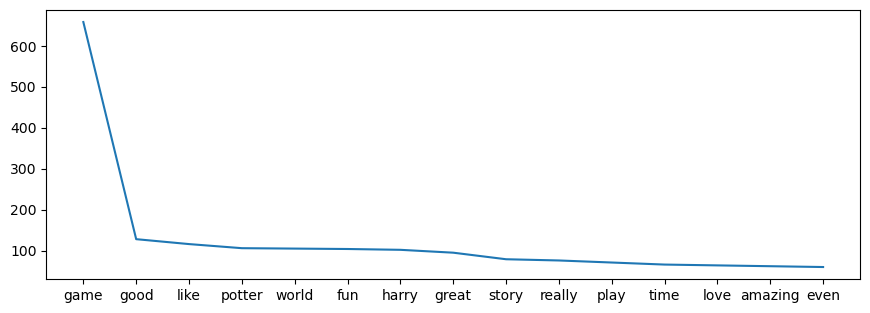

In [137]:
## create histogram to view
from matplotlib.pyplot import hist

plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.plot(com_words['word'], com_words['count'])
plt.show()

In [80]:
word_features = list(all_words.keys())[:1000]

print(len(word_features))

#def find_features(text):
  #  words = word_tokenize(text)
  #  features = {}
  #  for w in all_words:
   #     features[w] = (w in words)
    #return features

# Creating features for each review
#featuresets = [(find_features(rev), category) for (rev, category) in text]

1000
